In [39]:
pip install opendatasets --upgrade --quiet

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Downloading the Data

In [41]:
import opendatasets as od
url="https://www.kaggle.com/fedesoriano/stroke-prediction-dataset"
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anshalsingh
Your Kaggle Key: ··········


100%|██████████| 67.4k/67.4k [00:00<00:00, 18.9MB/s]

In [42]:
data="./stroke-prediction-dataset/healthcare-dataset-stroke-data.csv"

## Analyzing,fitting and preprocessing

- Attribute Information
1.  id: unique identifier
2.  gender: "Male", "Female" or "Other"
3.  age: age of the patient
4.  hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5.  heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6.  ever_married: "No" or "Yes"
7.  work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8.  Residence_type: "Rural" or "Urban"
9.  avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient






In [43]:
df=pd.read_csv(data)

In [44]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [45]:
columns=df.columns

In [46]:
columns=np.array(columns)
columns

array(['id', 'gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'], dtype=object)

In [47]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [48]:
#Dropping the missing data
df1=df
df1=df1.dropna(axis=0)

In [49]:
df1.shape

(4909, 12)

In [50]:
df1.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1


In [51]:
df1.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [52]:
#Coverting categorical data into numerical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [53]:
col=['gender','ever_married','work_type','Residence_type','smoking_status']

In [54]:
for i in col:
  df1[i]=le.fit_transform(df1[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
#dropping the id column
df1=df1.drop(columns=['id'])

In [56]:
df1.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1


In [57]:
df1.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,0.410063,42.865374,0.091872,0.049501,0.652679,2.170096,0.507232,105.305150,28.893237,1.375433,0.042575
std,0.492309,22.555115,0.288875,0.216934,0.476167,1.092593,0.499999,44.424341,7.854067,1.067322,0.201917
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.070000,23.500000,0.000000,0.000000
50%,0.000000,44.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.680000,28.100000,2.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,3.000000,1.000000,113.570000,33.100000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   int64  
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int64  
 5   work_type          4909 non-null   int64  
 6   Residence_type     4909 non-null   int64  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   int64  
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 460.2 KB


## EDA

In [120]:
sns.set(style='darkgrid')

- Gender

In [121]:
df1.gender.nunique()

3

In [122]:
gen_count=df1.gender.value_counts()
gen_count

0    2897
1    2011
2       1
Name: gender, dtype: int64

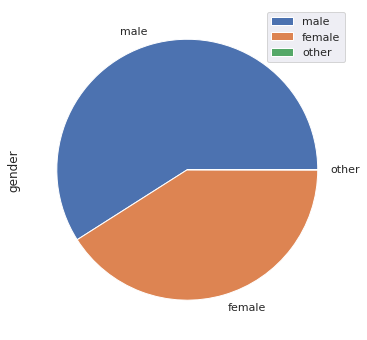

In [123]:
plt.figure(figsize=(6,6))
mylab=['male','female','other']
gen_count.plot(kind='pie',labels=mylab)
plt.legend()
plt.show()

- Age

In [124]:
df1.age.nunique()

104

In [125]:
age_count=df1.age.value_counts()
age_count

57.00    93
78.00    93
52.00    85
54.00    84
55.00    83
         ..
1.40      3
0.16      3
0.08      2
0.48      2
0.40      2
Name: age, Length: 104, dtype: int64

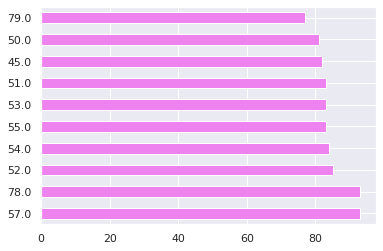

In [126]:
#Top 10 ages prone to strokes
age_count[:79].plot(kind='barh',color='violet')
plt.show()

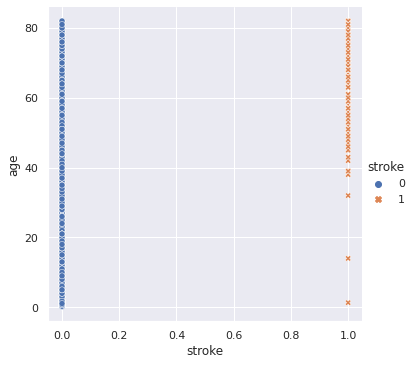

In [127]:
#Age v/s stroke 
sns.relplot(data=df,x='stroke',y='age',hue='stroke',style='stroke')
plt.show()

- Maximum no of people prone to strokes start around age of 40

- Hypertension

In [128]:
df1.hypertension.nunique()

2

In [129]:
hyp_count=df1.hypertension.value_counts()
hyp_count

0    4458
1     451
Name: hypertension, dtype: int64

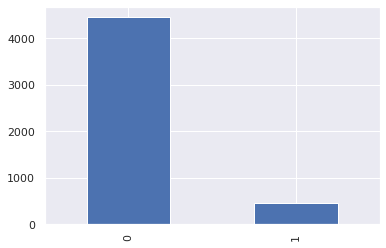

In [130]:
hyp_count.plot(kind='bar')
plt.show()

- Heart Disease

In [131]:
df1.heart_disease.nunique()

2

In [132]:
hd_count=df1.heart_disease.value_counts()
hd_count

0    4666
1     243
Name: heart_disease, dtype: int64

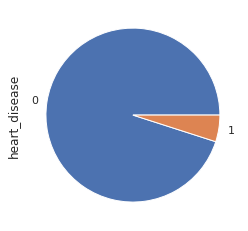

In [133]:
hd_count.plot(kind='pie')
plt.show()

- ever_married

In [134]:
marr_count=df1.ever_married.value_counts()

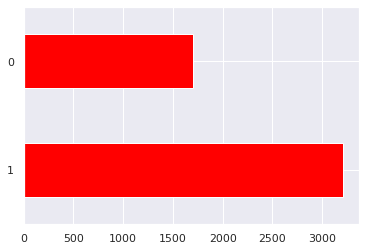

In [135]:
marr_count.plot(kind='barh',color='red')
plt.show()

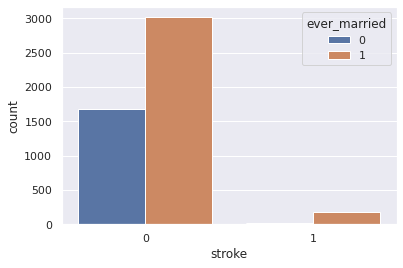

In [143]:
sns.countplot(x='stroke',hue='ever_married',data=df1)
plt.show()

- work_type

In [146]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [151]:
wt_count=df.work_type.value_counts()

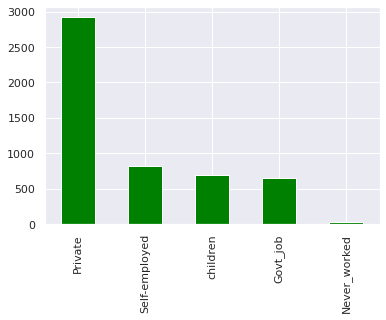

In [152]:
wt_count.plot(kind='bar',color='green')

plt.show()

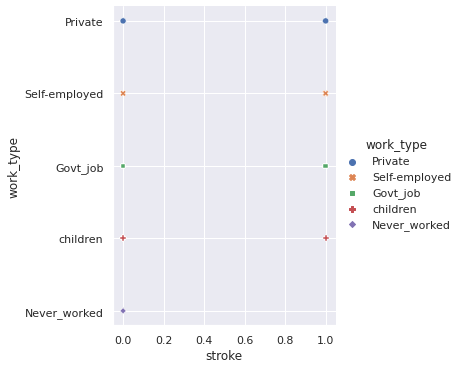

In [156]:
#Relation b/w work type and strokes
sns.relplot(data=df,x='stroke',y='work_type',hue='work_type',style='work_type')
plt.show()

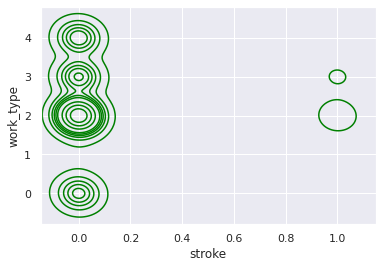

In [164]:
sns.kdeplot(data=df1,x='stroke',y='work_type',color='green')
plt.show()

- Residence Type

In [165]:
df1.Residence_type.nunique()

2

In [168]:
rd_count=df.Residence_type.value_counts()

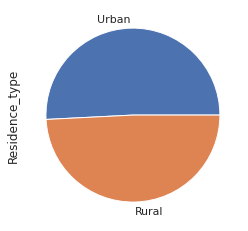

In [169]:
rd_count.plot(kind='pie')
plt.show()

- avg_glucose_leve

In [170]:
df1.avg_glucose_level.nunique()

3852

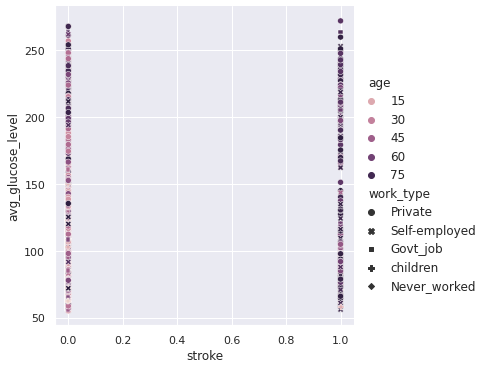

In [173]:
sns.relplot(data=df,x='stroke',y='avg_glucose_level',hue='age',style='work_type')
plt.show()

- BMI

In [174]:
df1.bmi.nunique()

418

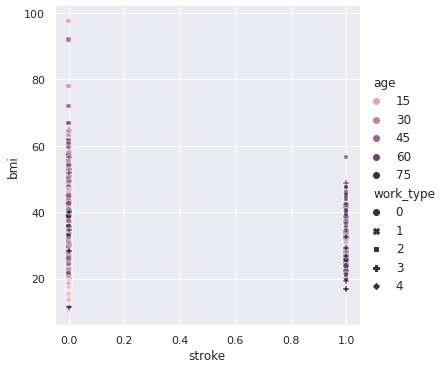

In [178]:
sns.relplot(data=df1,x='stroke',y='bmi',style='work_type',hue='age')
plt.show()

-Smoking Status

In [179]:
df1.smoking_status.nunique()

4

In [180]:
smoke_count=df.smoking_status.value_counts()

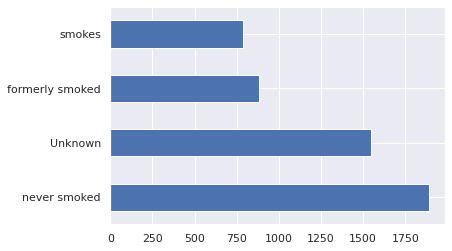

In [183]:
smoke_count.plot(kind='barh')
plt.show()

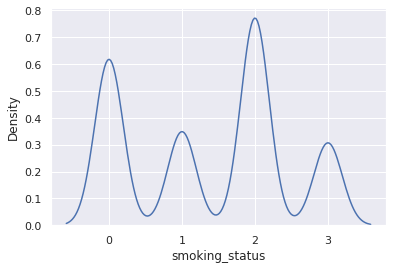

In [189]:
sns.kdeplot(x=df1.smoking_status)
plt.show()

- Stroke or Not

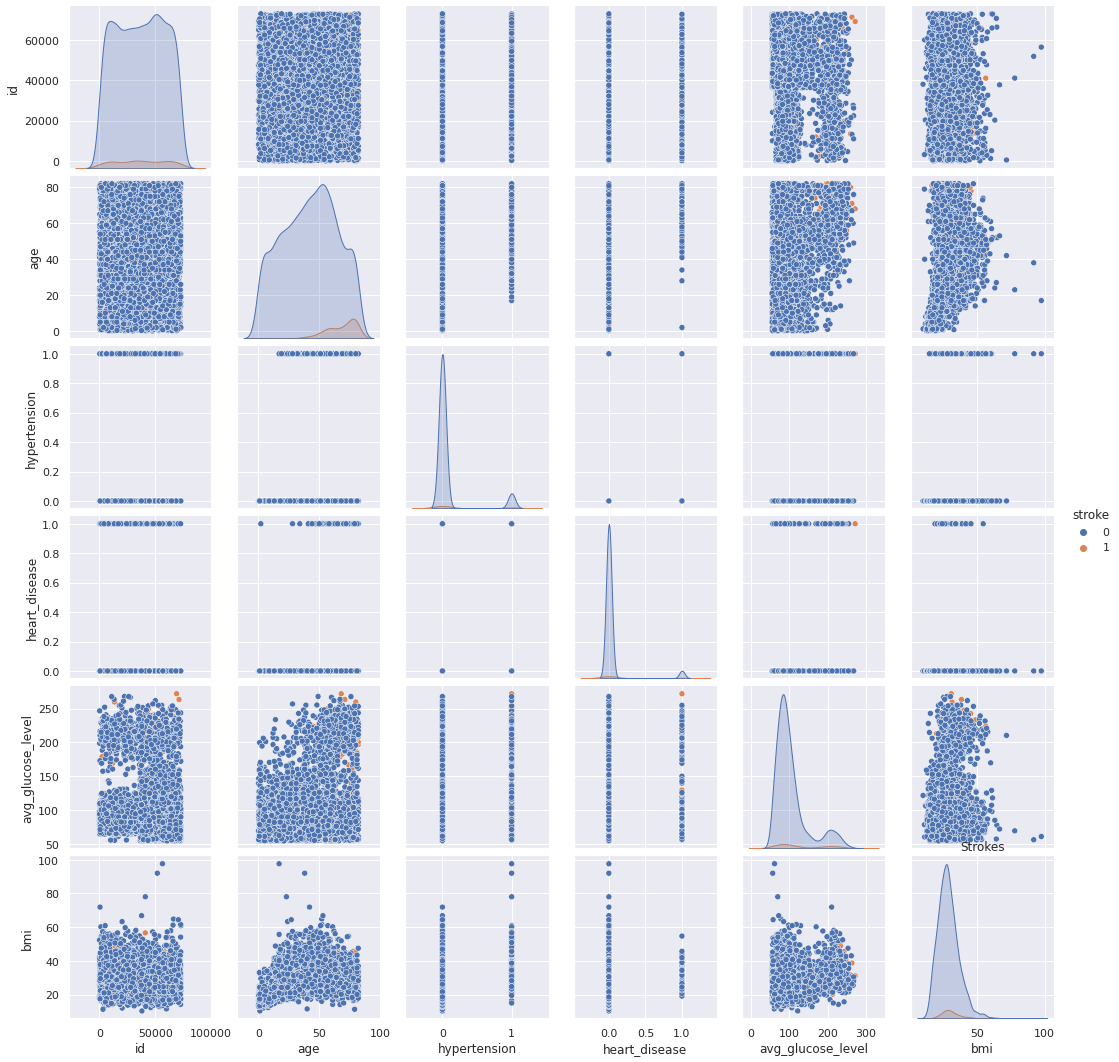

In [210]:
sns.pairplot(df,hue='stroke')
plt.title("Strokes")
plt.show()

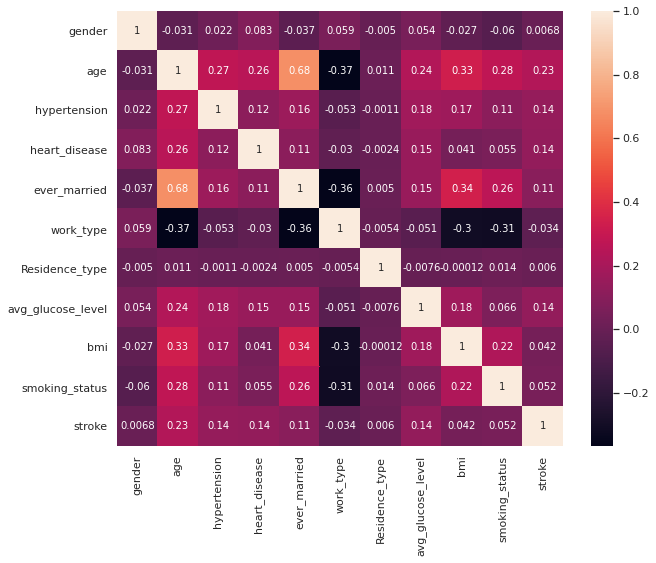

In [213]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot=True)
plt.show()

## Models

In [190]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [191]:
target=df1['stroke']
data=df1.drop(columns=['stroke'])

- train test split


In [192]:
from sklearn.model_selection import train_test_split

In [193]:
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.3)

In [194]:
x_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1463,0,22.0,0,0,0,2,1,135.64,19.5,2
585,0,65.0,0,1,1,2,0,196.36,34.5,1
4753,1,56.0,0,0,0,3,1,139.87,31.2,3
513,1,22.0,0,0,0,2,1,122.10,23.6,3
205,0,78.0,0,0,1,2,1,106.74,33.0,1
...,...,...,...,...,...,...,...,...,...,...
3760,0,28.0,0,0,0,2,1,107.74,38.5,2
3540,0,20.0,0,0,0,2,0,84.07,27.6,3
2604,1,60.0,0,0,1,2,0,87.86,29.0,1
4940,0,19.0,0,0,0,2,1,58.39,28.2,2


In [196]:
y_train

1463    0
585     0
4753    0
513     0
205     1
       ..
3760    0
3540    0
2604    0
4940    0
3229    0
Name: stroke, Length: 3436, dtype: int64

### Logistic Regression

In [202]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=500)

In [203]:
#Trian
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [204]:
#Accuracy of training

In [205]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [206]:
print(accuracy_score(lr.predict(x_train),y_train)*100)

95.77997671711293


In [207]:
#Testing

In [208]:
print(accuracy_score(lr.predict(x_test),y_test)*100)

95.72301425661914


### SVM

In [223]:
from sklearn.svm import SVC
svm=SVC()

In [215]:
#Training

In [225]:
svm.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [226]:
print(accuracy_score(svm.predict(x_train),y_train)*100)

95.77997671711293


In [220]:
#Testing

In [227]:
print(accuracy_score(svm.predict(x_test),y_test)*100)

95.6551255940258


### Random Forest Classifier

In [228]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)

In [229]:
#Training

In [230]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [231]:
print(accuracy_score(rf.predict(x_train),y_train)*100)

99.941792782305


In [232]:
#Testing

In [233]:
print(accuracy_score(rf.predict(x_test),y_test)*100)

95.58723693143246


### Decision tree

In [235]:
from sklearn.tree import DecisionTreeClassifier
dt_gini=DecisionTreeClassifier(max_depth=10,min_samples_leaf=15)

In [236]:
#Training

In [238]:
dt_gini.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [239]:
print(accuracy_score(dt_gini.predict(x_train),y_train)*100)

95.83818393480792


In [241]:
#Testing

In [242]:
print(accuracy_score(dt_gini.predict(x_test),y_test)*100)

95.72301425661914


In [243]:
#Show The Tree

In [245]:
from sklearn import tree
import graphviz

In [246]:
text=tree.export_text(dt_gini)
print(text)

|--- feature_1 <= 67.50
|   |--- feature_1 <= 47.50
|   |   |--- feature_1 <= 37.50
|   |   |   |--- feature_7 <= 57.94
|   |   |   |   |--- feature_8 <= 23.10
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_8 >  23.10
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_7 >  57.94
|   |   |   |   |--- feature_9 <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_9 >  2.50
|   |   |   |   |   |--- feature_7 <= 76.27
|   |   |   |   |   |   |--- feature_7 <= 71.21
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_7 >  71.21
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_7 >  76.27
|   |   |   |   |   |   |--- class: 0
|   |   |--- feature_1 >  37.50
|   |   |   |--- feature_5 <= 2.50
|   |   |   |   |--- feature_7 <= 83.43
|   |   |   |   |   |--- feature_7 <= 80.96
|   |   |   |   |   |   |--- feature_1 <= 44.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_

In [248]:
x=pd.DataFrame(data)
y=pd.DataFrame(target)

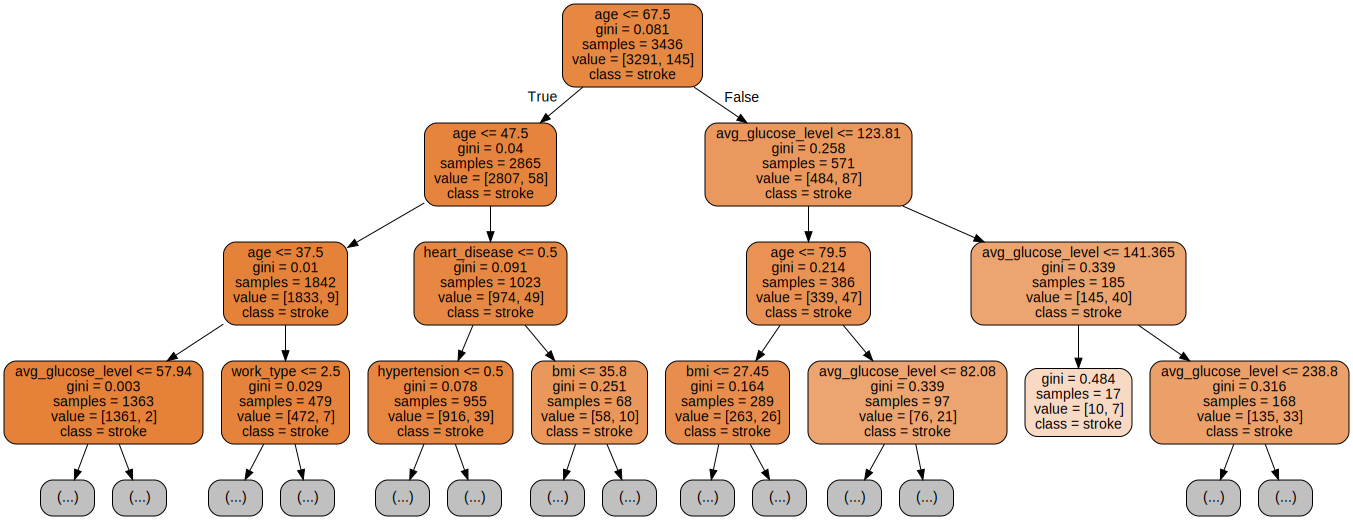

In [250]:
dot_data=tree.export_graphviz(dt_gini,max_depth=3,rounded=True,filled=True,feature_names=x.columns,class_names=y.columns)
graph=graphviz.Source(dot_data)
graph

In [251]:
print(classification_report(dt_gini.predict(x_train),y_train))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3420
           1       0.06      0.56      0.11        16

    accuracy                           0.96      3436
   macro avg       0.53      0.76      0.55      3436
weighted avg       0.99      0.96      0.97      3436



In [252]:
print(confusion_matrix(dt_gini.predict(x_train),y_train))

[[3284  136]
 [   7    9]]


In [253]:
pd.crosstab(y_test,dt_gini.predict(x_test))

col_0,0,1
stroke,,
0,1408,1
1,62,2
